# SVM Classifier

In [179]:
# Proper imports
file_loc = '../../_Datasets/epi_r.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
sns.set_style('whitegrid')
%matplotlib inline

In [180]:
df = pd.read_csv(file_loc)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [182]:
df.isnull().sum()[df.isnull().sum() > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

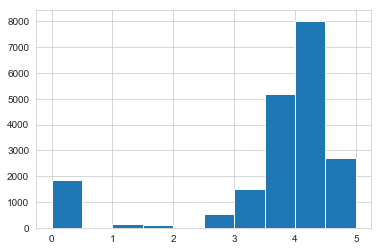

In [183]:
df.rating.hist()

#### Notes: Imbalance

There is an issue with the distribution of ratings. Let's find a binary trick that will split it into two roughly even buckets.

In [184]:
# See if we can go binary with > 4
df.rating.value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

In [185]:
binary_rating = (df.rating > 4) * 1
df['binary_rating'] = binary_rating

## Basic SVC run

#### Let's try a model with all of the information on binary to see if this improves.

In [15]:
# DO NOT RUN! Takes about 20 minutes.
X = df.drop(columns=['title', 'calories', 'protein', 'fat', 'sodium', 'rating', 'binary_rating'])
y = df.binary_rating

svc_clf = SVC()
cross_val_score(svc_clf, X, y, cv=5)

array([0.56743954, 0.57466966, 0.57317377, 0.56907731, 0.57894737])

#### Notes: Binary classifier with SVC

This does run better than the multiclass classifier, but it isn't much better than randomly selecting an outcome. Plus, we don't have a test set!

In [186]:
df2 = df.copy()
df2.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,binary_rating
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


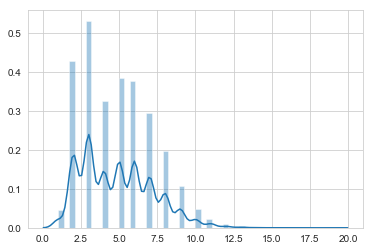

In [187]:
sns.distplot([len(title) for title in df2.title.str.split()])

#### Notes: Bag of words

This looks like another fun way to analyze the data, but I have a feeling adding many more features could be problematic.

In [215]:
# Drop NA values and features that won't fit into linear algebra algorithms
X = df2.drop(['title', 'calories', 'protein', 'fat', 'sodium', 'rating', 'binary_rating'], 1)
y = df2.binary_rating

# Let's see if PCA will help clean up the feature set
pca = PCA()
params = {'n_components': [10, 15, 20, 25, 30, 35, 40, 45, 50]}
# fits = {'get_params': ['explained_variance_ratio_']}
clf = GridSearchCV(pca, params, cv=5)#, scoring='explained_variance')#, fit_params=fits)

clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [191]:
pd.DataFrame(clf.cv_results_)

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.312560,0.004783,0.057646,0.003179,10,{'n_components': 10},564.503439,566.960656,563.784863,564.226023,...,564.675062,1.170397,9,565.387780,564.759620,565.571594,565.456877,565.540734,565.343321,0.298884
1,0.337098,0.005352,0.058244,0.001850,15,{'n_components': 15},584.695494,587.205003,583.844869,584.413044,...,584.791825,1.253556,8,585.862803,585.237887,586.067487,585.873908,586.072348,585.822886,0.306098
2,0.353055,0.001784,0.061834,0.004039,20,{'n_components': 20},601.215064,603.147769,599.589630,600.691434,...,600.937883,1.235868,7,602.312271,601.818640,602.723206,602.436043,602.552302,602.368492,0.306486
3,0.372005,0.005007,0.060838,0.002442,25,{'n_components': 25},616.262542,618.126620,614.576256,615.922839,...,616.021672,1.202636,6,617.660743,617.181863,618.117897,617.777928,617.959406,617.739568,0.319431
4,0.381778,0.004609,0.059840,0.003512,30,{'n_components': 30},630.246005,631.921700,628.341141,630.251946,...,630.057054,1.164416,5,632.038179,631.602059,632.560146,632.008802,632.201307,632.082099,0.309993
5,0.402722,0.005023,0.060837,0.001093,35,{'n_components': 35},643.350010,645.256271,641.363643,643.566773,...,643.265546,1.257295,4,645.488014,645.085290,645.962915,645.424381,645.700433,645.532207,0.292275
6,0.429251,0.011188,0.059441,0.003763,40,{'n_components': 40},655.388589,657.092114,653.472140,655.877629,...,655.316003,1.199713,3,657.814469,657.396404,658.304552,657.621853,657.978014,657.823059,0.309334
7,0.440222,0.005836,0.055851,0.001093,45,{'n_components': 45},665.941311,667.655634,664.193421,666.953273,...,666.053910,1.193950,2,668.866944,668.486681,669.230205,668.669643,668.950817,668.840858,0.252634
8,0.466751,0.009752,0.059640,0.004943,50,{'n_components': 50},675.670621,677.299054,673.848291,676.780991,...,675.775217,1.208796,1,678.929680,678.670609,679.460934,678.669240,679.117498,678.969592,0.298157


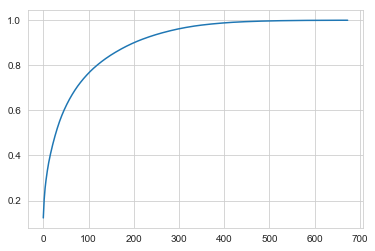

In [192]:
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### Notes: PCA on 700 features

There is no sharp curve in feature strength, indicating perhaps many of them are weak, and ultimately unnecessary.

Below we can run some plots against value_counts == 0 and better understand how many truly sparse features exist.

In [196]:
keys_ = []
values_ = []

for col in X.columns:
    keys_.append(col)
    values_.append(X[col].value_counts()[0])
    
imbalance = pd.DataFrame(list(map(int, values_)), index=keys_)

In [197]:
imbalance.head()

,0
#cakeweek,20046
#wasteless,20051
22-minute meals,20035
3-ingredient recipes,20025
30 days of groceries,20045


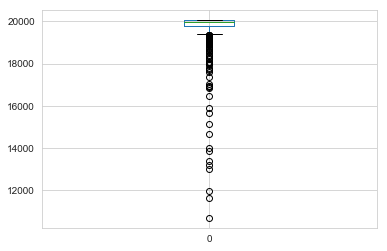

In [198]:
imbalance.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029D7C54E780>]],
      dtype=object)

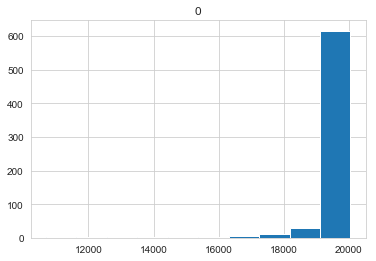

In [199]:
imbalance.hist()

#### Notes: Distributions of the sparsities

There are many (far above the majority actually) features with thousands of zeroes. Let's try to get a clearer picture of the cutoff so we can preserve the strongest 30 or so.

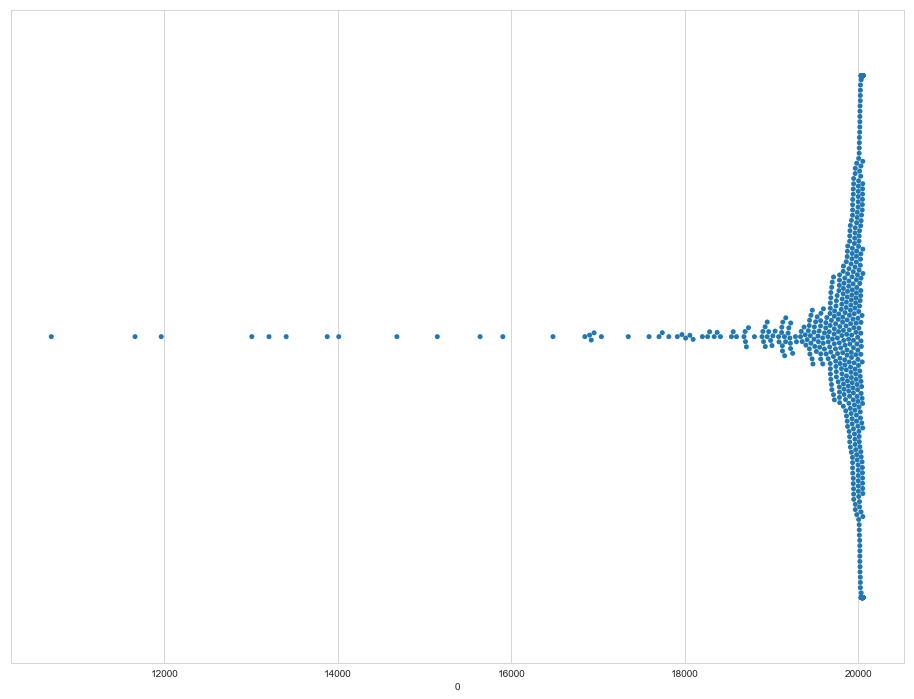

In [200]:
fig, ax = plt.subplots(figsize=(16,12))
sns.swarmplot(x=imbalance[0], ax=ax)

In [201]:
# Cutoff of 18300
len(imbalance[imbalance[0] < 18300])

31

In [202]:
# Selecting strongest feature names
imbalance[imbalance[0] < 18300].index

Index(['bake', 'bon appétit', 'dairy free', 'dessert', 'dinner', 'egg', 'fall',
       'fruit', 'gourmet', 'healthy', 'kid-friendly', 'kidney friendly',
       'kosher', 'milk/cream', 'no sugar added', 'onion', 'peanut free',
       'pescatarian', 'quick & easy', 'sauté', 'side', 'soy free',
       'sugar conscious', 'summer', 'tomato', 'tree nut free', 'vegan',
       'vegetable', 'vegetarian', 'wheat/gluten-free', 'winter'],
      dtype='object')

In [203]:
X2 = X[imbalance[imbalance[0] < 18300].index]
X2.head()

,bake,bon appétit,dairy free,dessert,dinner,egg,fall,fruit,gourmet,healthy,...,soy free,sugar conscious,summer,tomato,tree nut free,vegan,vegetable,vegetarian,wheat/gluten-free,winter
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25)

In [205]:
svc_clf = SVC()
cross_val_score(svc_clf, X_train, y_train, cv=5)

array([0.5674867 , 0.56382979, 0.55950798, 0.57147606, 0.57964749])

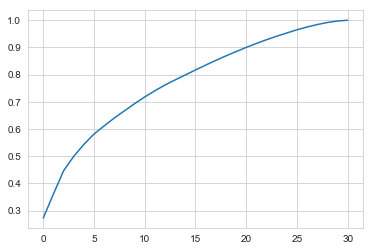

In [206]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### Notes: PCA on the reduced set

It doesn't seem that a sharp curve or elbow indicating drastic variance improvement exists. We won't use PCA for the model.

In [213]:
# Grid search on different C values
params = np.linspace(0.1, 2, num=10)
search = GridSearchCV(svc_clf, param_grid={'C': params})

In [214]:
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1    , 0.31111, 0.52222, 0.73333, 0.94444, 1.15556, 1.36667,
       1.57778, 1.78889, 2.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [209]:
search.best_params_

{'C': 1.0}

In [210]:
search.best_score_

0.5709156193895871

In [218]:
svc_clf.fit(X_train, y_train).score(X_test, y_test)

0.5649311789347696

#### Notes: Score on test set

The scores for the test set seem to be very similar to the train scores - thus we are not experiencing overfitting. The model, however, does not seem to perform so well, barely scoring better than chance.